In [123]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [124]:
df=pd.read_csv("rnaseq_gene_normalized.txt",sep="\t")

In [125]:
df

,GENE_ID,X0100_0_1E6_A,X0100_12_1E6_A,X0100_24_1E6_A,X0100_2_1E6_A,X0100_48_1E6_A,X0100_4_1E6_A,X0100_72_1E6_A,X0100_8_1E6_A,X2560_0_1E6_A,...,X4315_72_1E6_A,X4315_8_1E6_A,X4401_0_1E6_A,X4401_12_1E6_A,X4401_24_1E6_A,X4401_2_1E6_A,X4401_48_1E6_A,X4401_4_1E6_A,X4401_72_1E6_A,X4401_8_1E6_A
0,ENSG00000000003,1.560168,1.149512,1.200617,1.171045,0.104252,0.560983,0.122888,0.734000,2.080245,...,0.087218,1.075992,1.966915,1.487379,1.892428,1.369849,0.531232,0.715423,0.295902,1.002531
1,ENSG00000000005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,ENSG00000000419,7.361860,7.962819,8.063663,7.532758,8.254621,7.566758,7.790407,7.968574,7.350681,...,7.475078,8.026993,7.053818,7.938919,8.206622,7.456894,7.904217,7.498256,7.529448,7.986997
3,ENSG00000000457,4.512441,3.730237,3.478379,4.006504,3.811018,3.808184,4.110413,3.643762,4.651807,...,4.003342,4.073942,4.778186,3.674755,3.759029,4.021214,3.794337,3.937924,3.803094,3.945481
4,ENSG00000000460,2.885548,2.618076,3.755195,3.456125,4.533399,3.659314,4.309647,2.631769,2.897667,...,4.253782,3.459763,3.217337,2.823684,3.707222,4.533028,4.526163,4.108755,4.114606,3.148046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57815,ENSGR0000264819,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
57816,ENSGR0000265350,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
57817,ENSGR0000265658,0.000000,0.000000,0.000000,1.309573,0.000000,0.000000,0.000000,1.969494,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
57818,ENSGR0000266731,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [207]:
from scipy import stats

desired_order = [ 0,3, 5, 7, 1, 2, 4, 6]
# Rearrange columns of df according to the desired order
id='X3878'
c = df.filter(like=id).iloc[:, desired_order]
c["GENE_ID"]=df["GENE_ID"]
l=["0","2","4","8","12","24","48","72"]
for i in l:
    c[i]=c[id+"_"+i+"_1E6_A"]
    c=c.drop(id+"_"+i+"_1E6_A",axis=1)
c["var"]=c.drop("GENE_ID",axis=1).var(axis=1)
c.sort_values("var").describe()

,0,2,4,8,12,24,48,72,var
count,57820.000000,57820.000000,57820.000000,57820.000000,57820.000000,57820.000000,57820.000000,57820.000000,57820.000000
mean,1.081235,1.054104,1.002454,0.972740,1.020467,1.066257,1.104779,1.086280,0.171034
std,1.985032,1.968667,1.948235,1.964297,2.009838,2.068942,2.059070,2.016795,0.526428
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000608
75%,1.122448,1.075517,0.862424,0.669263,0.756766,0.805047,1.060658,1.106305,0.135958
max,14.963693,14.730891,14.617380,14.564700,14.293114,14.106595,14.269085,14.762968,13.917286


In [208]:

c=c[c["var"]>0.138507]
c

,GENE_ID,0,2,4,8,12,24,48,72,var
0,ENSG00000000003,2.044772,1.777257,1.192407,1.273056,1.593340,1.646015,0.840726,0.195842,0.346756
2,ENSG00000000419,7.231411,7.346081,7.363069,8.141756,7.823180,8.258432,8.123434,7.605666,0.165427
4,ENSG00000000460,2.125929,4.737714,5.285854,2.957983,3.385116,4.137208,4.646132,4.179058,1.086416
6,ENSG00000000971,1.777004,1.462365,1.283662,0.538803,0.534685,0.411274,0.990207,1.265528,0.247960
7,ENSG00000001036,3.454031,2.987432,2.488552,2.481217,2.860716,3.850605,4.425529,4.358105,0.614399
...,...,...,...,...,...,...,...,...,...,...
57767,ENSG00000273486,2.171015,2.082151,1.092670,0.822356,0.973991,1.304581,1.561516,1.696968,0.251554
57768,ENSG00000273487,1.064853,0.690923,0.386628,0.000000,0.160580,0.057607,0.111956,0.115612,0.139779
57772,ENSG00000273493,1.980726,1.839528,1.615571,2.257189,2.488808,0.751960,0.746314,1.633005,0.405797
57782,ENSGR0000182162,1.343674,0.699087,0.458698,0.139541,0.170159,0.206104,0.303328,0.446691,0.158997


In [209]:

# for i,j in zip(c,d):
#     plt.figure(figsize=(12, 12))  # Width: 10 inches, Height: 6 inches
#     g=pd.DataFrame()
#     g["diff"]=(df[i]-df["X0100_0_1E6_A"])
#     g["diff"]=g["diff"]-g["diff"].min()
#     plt.scatter(x, df[j] - df[i], label='Data', s=1,c="red")    
#     plt.xlabel(j+"   -   "+i)
#     plt.ylabel('Y')
#     plt.title('Difference of ' +i+" & "+j )
#     # plt.grid(True)  # Add grid lines
#     # plt.legend()  # Show legend
#     plt.show()
# # print(filtered_columns.columns)
# g
    

In [210]:
# x = list(range(0, 57820))

# # Plot the data
# e = df.filter(like='X0100')
# # Define the desired column order
# # Define the desired column order
# desired_order = [0, 3, 5, 7, 1, 2, 4,]  # Column numbers in the desired order
# desired_order2 = [ 3, 5, 7, 1, 2, 4, 6]
# # Rearrange columns of df according to the desired order
# c = e.iloc[:, desired_order]
# d =e.iloc[:,desired_order2]


# for i,j in zip(c,d):
#     plt.figure(figsize=(2, 2))  # Width: 10 inches, Height: 6 inches
#     g=pd.DataFrame()
#     g["diff"]=(df[i]-df["X0100_0_1E6_A"])
#     g["diff"]=g["diff"]-g["diff"].min()
#     plt.scatter(x, df[j]-df[i], label='Data',)
#     plt.xlabel(i+j)
#     plt.ylabel('Y')
#     plt.title('Linear Data Plot')
#     plt.grid(True)  # Add grid lines
#     plt.legend()  # Show legend
#     plt.show()
# # print(filtered_columns.columns)
# g
    

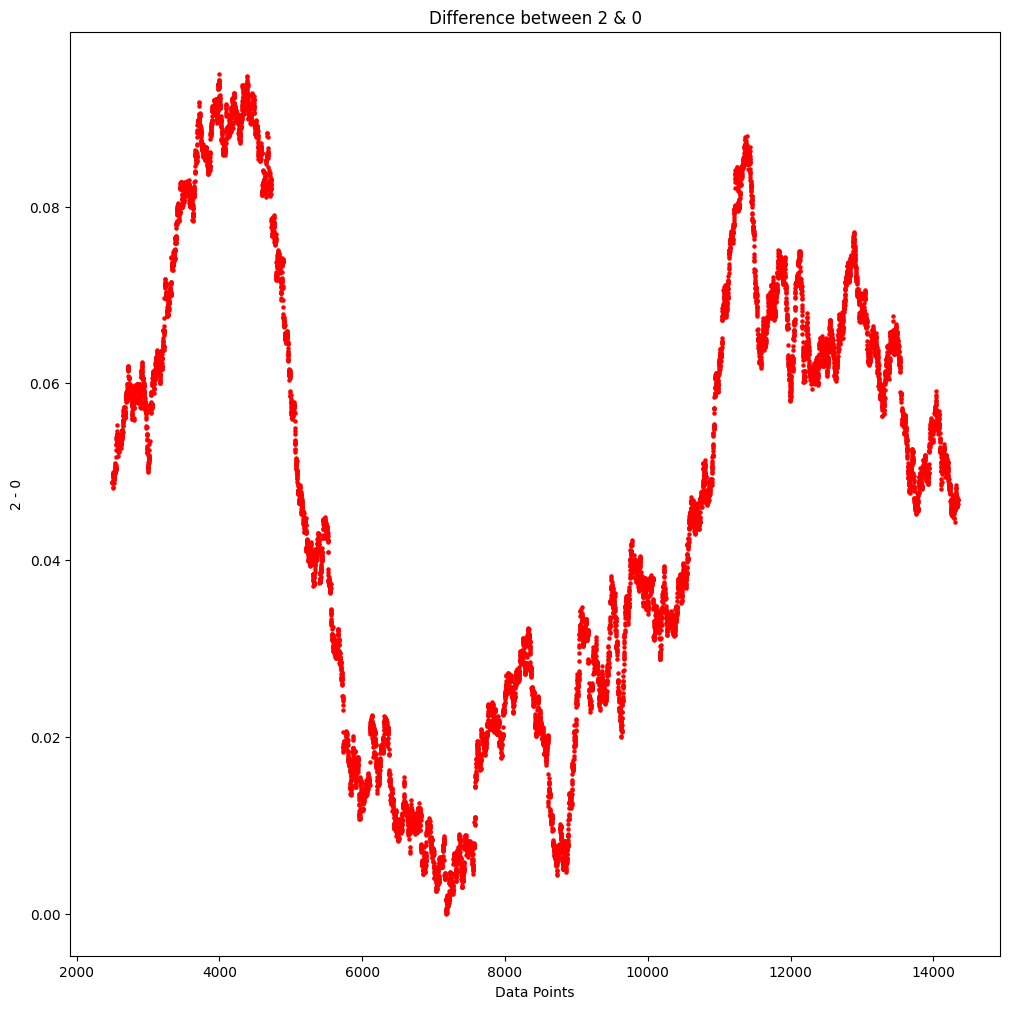

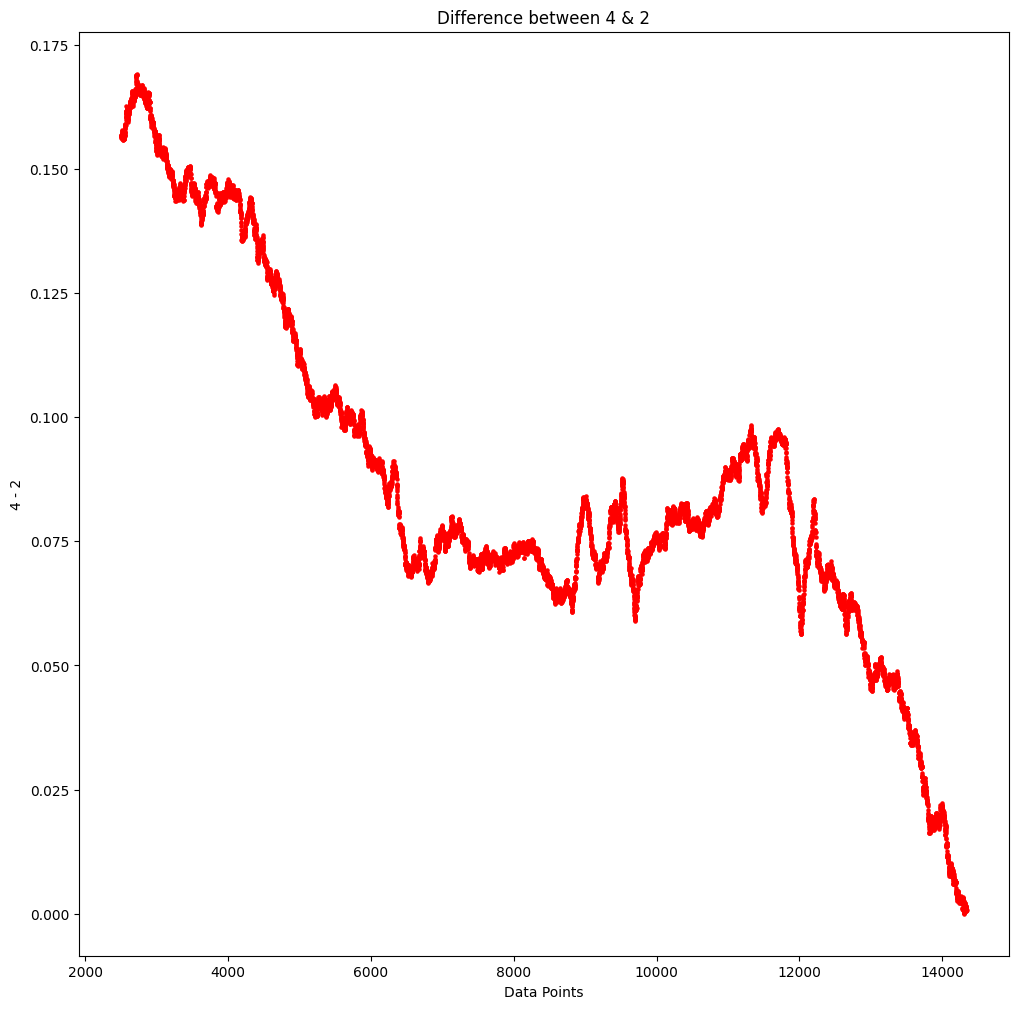

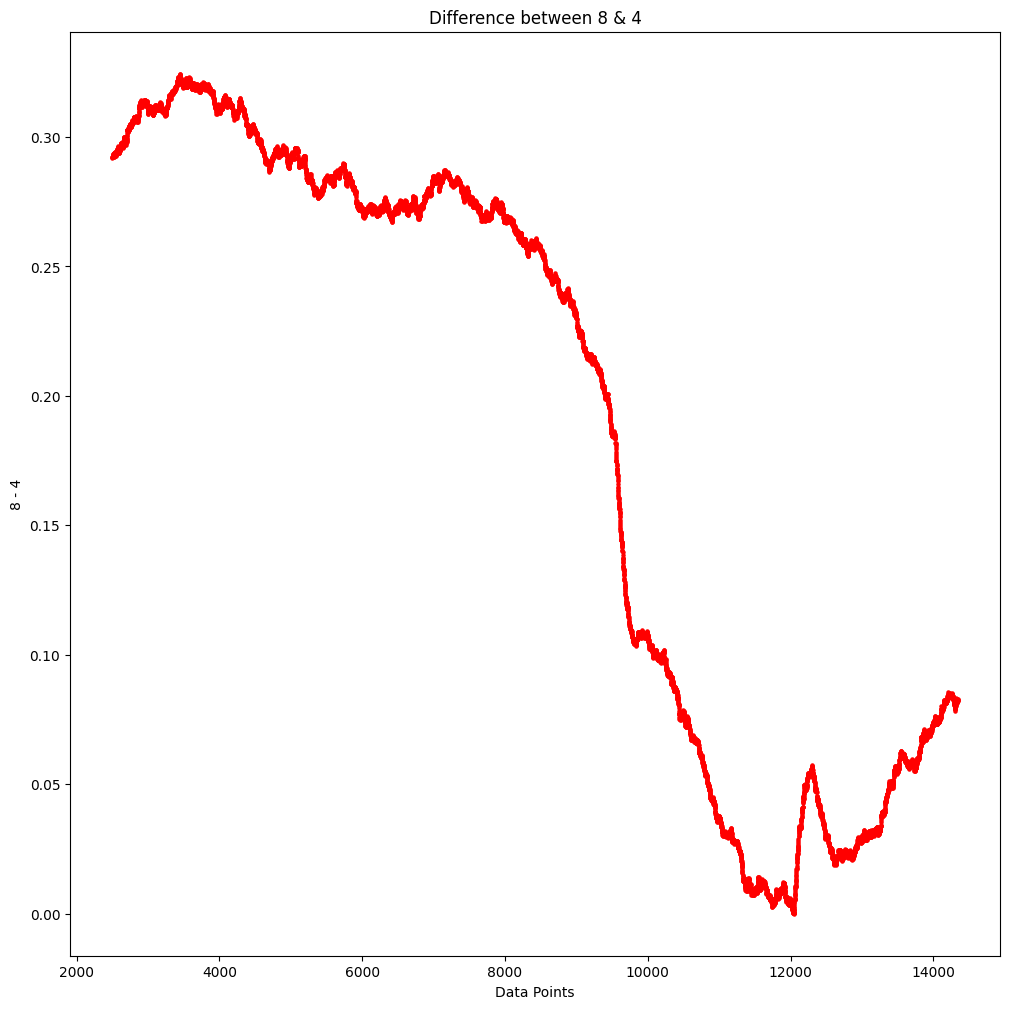

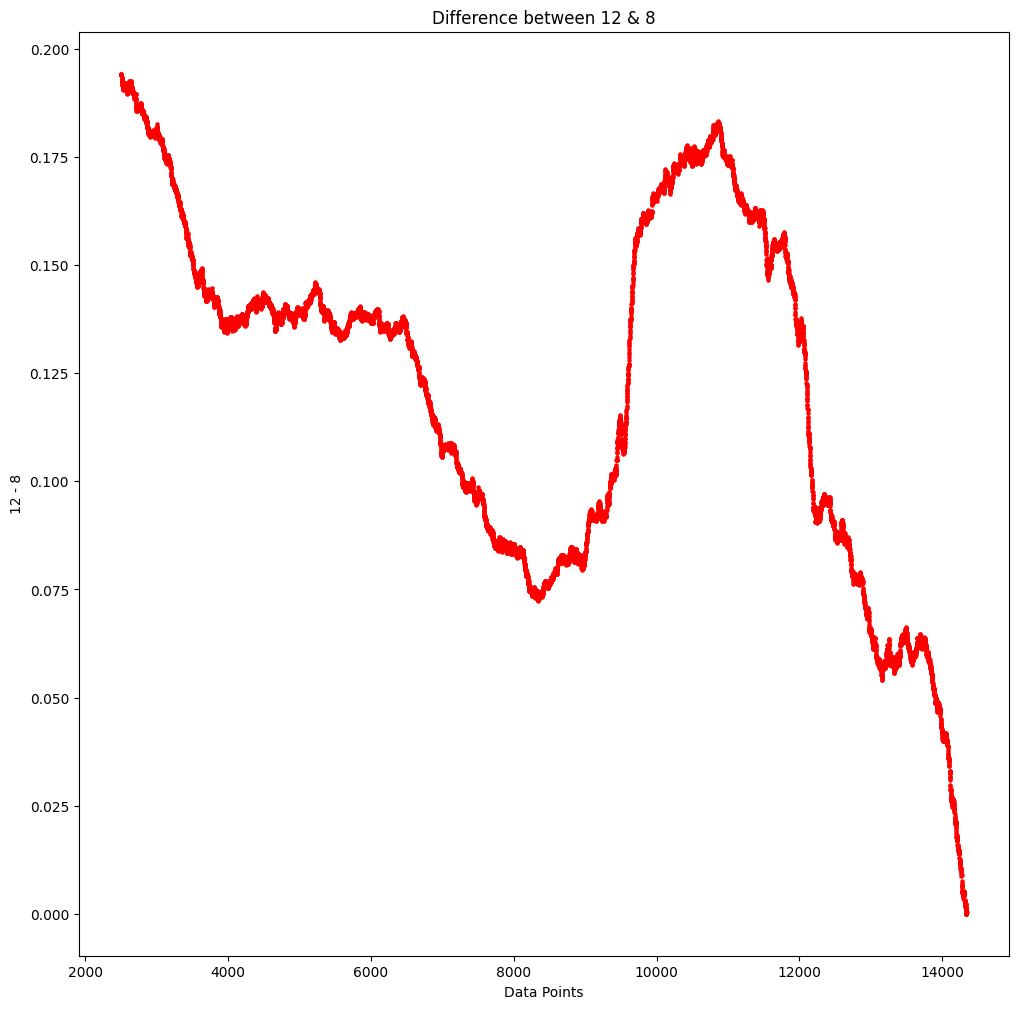

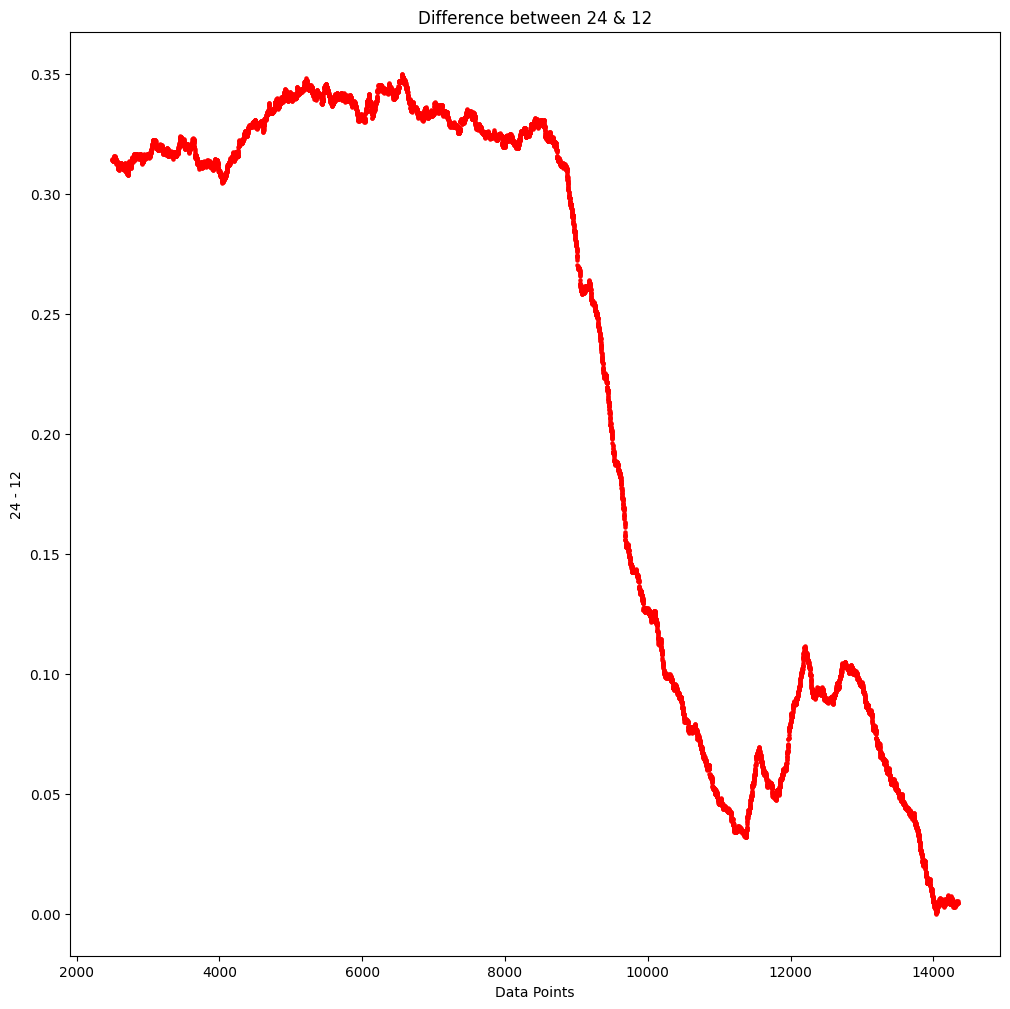

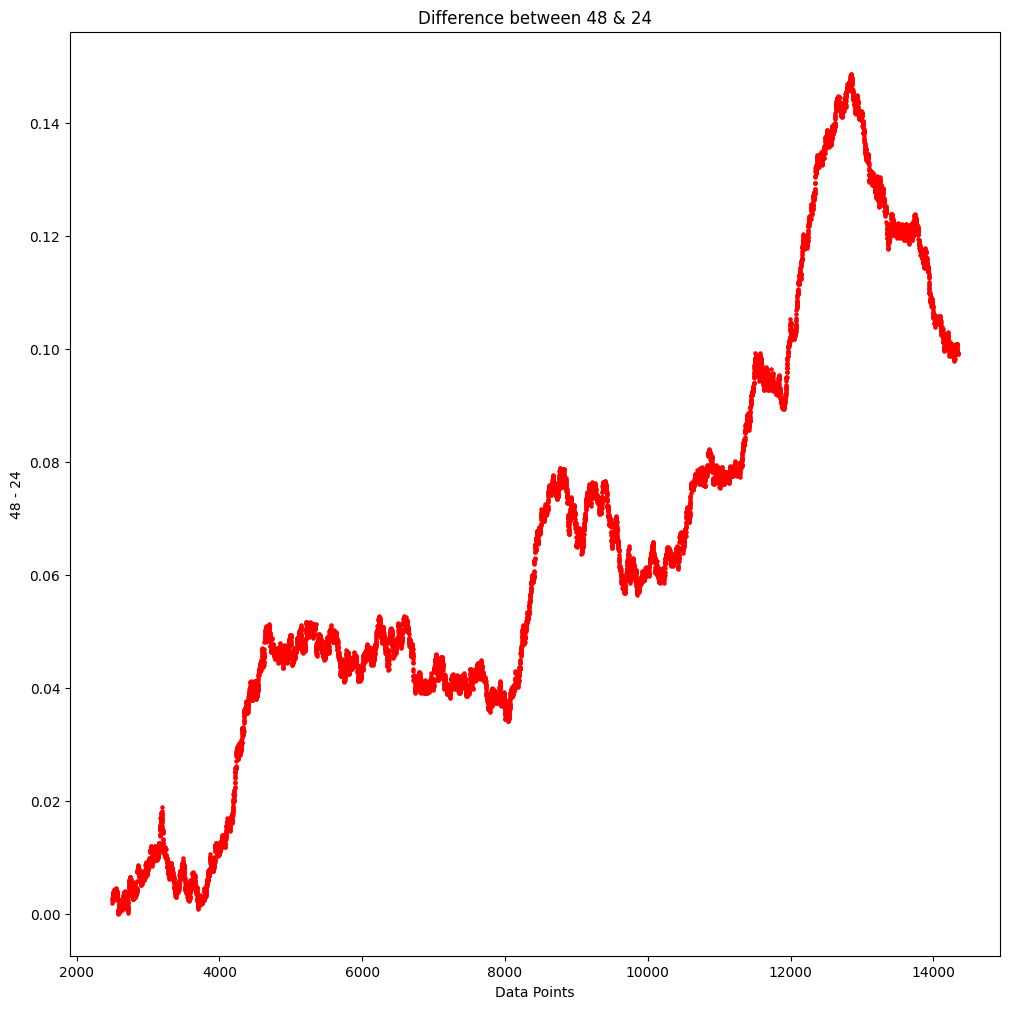

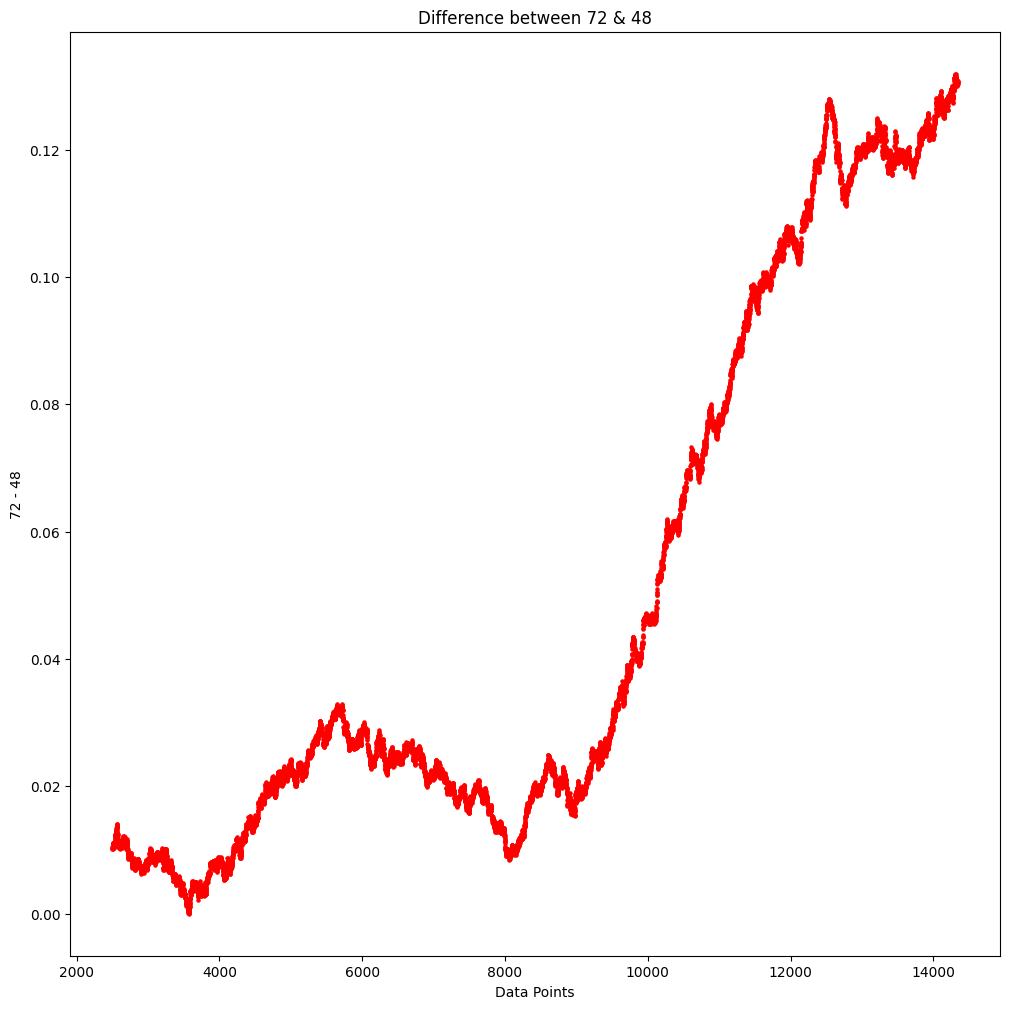

In [211]:
import pandas as pd
import matplotlib.pyplot as plt

total=pd.DataFrame()
col=["0","2","4","8","12","24","48","72"]
for i in range(7):
    plt.figure(figsize=(12, 12))
    diff = c[col[i+1]] - c[col[i]]
    rolling_mean = diff.rolling(2500).mean()  # Calculate rolling mean of the difference

    da=rolling_mean-rolling_mean.min()
    # da=da*22/da.max()
    # da=da.round()
    # da=da*4
    total[col[i+1] +" - "+col[i]]=da
    plt.scatter([i for i in range(len(da))],da , label='Data',s=5,c='red')
    plt.xlabel("Data Points")
    plt.ylabel(col[i+1] +" - "+col[i])
    plt.title('Difference between '+ col[i+1] +" & "+col[i])
    # plt.grid(True)
    # plt.legend()
    # plt.show()


In [212]:
df["X0100_2_1E6_A"].describe()

count    57820.000000
mean         1.119388
std          2.009544
min          0.000000
25%          0.000000
50%          0.000000
75%          1.298972
max         14.590143
Name: X0100_2_1E6_A, dtype: float64

In [213]:
total=total.dropna().reset_index().drop("index",axis=1)
total

,2 - 0,4 - 2,8 - 4,12 - 8,24 - 12,48 - 24,72 - 48
0,0.048866,0.156669,0.292465,0.194158,0.314261,0.001930,0.010121
1,0.048868,0.156889,0.292384,0.194128,0.314454,0.002478,0.010334
2,0.048785,0.156797,0.291963,0.194274,0.314017,0.002766,0.010496
3,0.048218,0.156553,0.292868,0.193876,0.313885,0.002533,0.010273
4,0.048314,0.156606,0.293140,0.193889,0.314014,0.002437,0.010476
...,...,...,...,...,...,...,...
11838,0.046508,0.000644,0.082521,0.000000,0.005443,0.099488,0.130343
11839,0.046369,0.000575,0.082417,0.000018,0.005178,0.099212,0.130333
11840,0.046800,0.000761,0.083029,0.000017,0.004525,0.099079,0.130568
11841,0.046845,0.000599,0.082638,0.000029,0.004425,0.099244,0.130604


In [214]:
pip install pygame

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [215]:
# # Assuming `total` is your DataFrame with 7 columns
# # and you want to calculate averages for intervals of size 50
# import numpy as np  # Assuming you're using numpy for nan values

# # Create a new DataFrame to store the averages for each column
# averages_df = pd.DataFrame()

# # Calculate the number of intervals
# num_intervals = len(total) // 12

# # Iterate over each column of the DataFrame
# for column in total.columns:
#     # Create a list to store the averages for the current column
#     column_averages = []
    
#     # Iterate over each interval
#     for i in range(num_intervals):
#         # Calculate the start and end indices for the current interval
#         start_index = i * 12
#         end_index = (i + 1) * 12
        
#         # Calculate the average for the current interval in the current column
#         interval_average = total[column][start_index:end_index].mean()
        
#         # Append the average to the list of averages for the current column
#         if not (np.isnan(interval_average)):
#             column_averages.append(interval_average)
    
#     # Add the list of averages for the current column to the DataFrame
#     # gm=[]
#     # for i in range(len(column_averages)-1):
#     #     gm.append((column_averages[i]+column_averages[i+1])/2+20)
#     column_averages=pd.DataFrame(column_averages)
#     averages_df[column] = (column_averages-column_averages.min())/(column_averages.max()-column_averages.min())*88+20
# # averages_df=averages_df*100+20
# # Print the DataFrame containing the averages for each column
# averages_df = averages_df.astype(int)


# # Print the DataFrame with updated column names
# averages_df




In [216]:
import pandas as pd
import numpy as np

# Assuming `total` is your DataFrame with 7 columns and you want to calculate averages for intervals of size 50
interval_size = 12

# Calculate the number of intervals
num_intervals = len(total) // interval_size

# Create a new DataFrame to store the averages
averages_df = pd.DataFrame()

# Iterate over each column of the DataFrame
for column in total.columns:
    # Calculate the average of each 50 consecutive values (interval of size 50)
    interval_averages = [
        total[column][i * interval_size:(i + 1) * interval_size].mean()
        for i in range(num_intervals)
    ]
    
    # Create a copy of the interval averages to apply median replacement
    modified_intervals = interval_averages.copy()
    
    # Replace every 5th value with the median of the previous 5 values
    for i in range(len(interval_averages)):
        if i >= 3:  # Check if enough values are available to calculate median
            previous_5_values = interval_averages[i - 3:i + 1]  # Get previous 5 values
            median_value = np.median(previous_5_values)  # Calculate median
            modified_intervals[i] = median_value  # Replace the 5th value with median
            modified_intervals[i-1] = median_value  # Replace the 5th value with median
            modified_intervals[i-2] = median_value  # Replace the 5th value with median
            modified_intervals[i-3] = median_value  # Replace the 5th value with median
            # modified_intervals[i-4] = median_value  # Replace the 5th value with median
            # modified_intervals[i-5] = median_value  # Replace the 5th value with median
            # modified_intervals[i-6] = median_value  # Replace the 5th value with median
            # modified_intervals[i-7] = median_value  # Replace the 5th value with median
            # modified_intervals[i-8] = median_value  # Replace the 5th value with median
            # modified_intervals[i-9] = median_value  # Replace the 5th value with median
    
    # Add the modified intervals to the DataFrame for the current column
    modified_intervals=pd.DataFrame(modified_intervals)
    averages_df[column] = (modified_intervals-modified_intervals.min())/(modified_intervals.max()-modified_intervals.min())*88+20

# Print the DataFrame containing the modified values
averages_df = averages_df.dropna().astype(int)
averages_df


,2 - 0,4 - 2,8 - 4,12 - 8,24 - 12,48 - 24,72 - 48
0,66,102,99,107,99,21,26
1,66,102,99,107,99,21,27
2,68,102,100,107,99,21,27
3,69,103,100,107,99,21,27
4,69,104,100,107,98,20,27
...,...,...,...,...,...,...,...
981,63,20,41,20,20,79,107
982,63,20,41,20,20,79,108
983,63,20,41,20,20,79,108
984,63,20,41,20,20,79,108


In [217]:
len(averages_df)

986

In [218]:
averages_df


,2 - 0,4 - 2,8 - 4,12 - 8,24 - 12,48 - 24,72 - 48
0,66,102,99,107,99,21,26
1,66,102,99,107,99,21,27
2,68,102,100,107,99,21,27
3,69,103,100,107,99,21,27
4,69,104,100,107,98,20,27
...,...,...,...,...,...,...,...
981,63,20,41,20,20,79,107
982,63,20,41,20,20,79,108
983,63,20,41,20,20,79,108
984,63,20,41,20,20,79,108


In [219]:
# import numpy as np  # Assuming you're using numpy for nan values

# la = [-1]  # Initialize with a value that's not nan
# for i in da:
#     if not (np.isnan(i) or la[-1] == i):
#         la.append(i)

# # Remove the initial value used for initialization
# la.remove(-1)
# len(la)
# la=[int(item) for item in la]

In [220]:
len(averages_df["2 - 0"])

986

In [221]:
z=x = list(range(0, 986))

In [222]:
# plt.figure(figsize=(10, 10))    
# plt.scatter(z,averages_df["2 - 0"] , label='Data')
# plt.xlabel("0 - 2")
# plt.ylabel('Notes')
# plt.title('')
# plt.grid(True)
# plt.legend()
# plt.show()

In [223]:
# from midiutil import MIDIFile

# # Create MIDI file object and add tempo
# total_notes = len(averages_df["2 - 0"])  # Total number of notes for 1 minute
# notes_per_minute = 30 # Number of notes per minute
# bpm =len(averages_df["2 - 0"])# Beats per minute
# pitch = averages_df["2 - 0"]  # Example pitch (you need to provide pitch data)

# my_midi_file = MIDIFile(7)  # One track
# my_midi_file.addTempo(track=0, time=0, tempo=bpm)  # Add tempo
# my_midi_file.addTempo(track=1, time=0, tempo=bpm)  # Add tempo
# my_midi_file.addTempo(track=2, time=0, tempo=bpm)  # Add tempo
# my_midi_file.addTempo(track=3, time=0, tempo=bpm)  # Add tempo
# my_midi_file.addTempo(track=4, time=0, tempo=bpm)  # Add tempo
# my_midi_file.addTempo(track=5, time=0, tempo=bpm)  # Add tempo
# my_midi_file.addTempo(track=6, time=0, tempo=bpm)  # Add tempo

# # Add MIDI notes
# for i in range(total_notes):
#     time = i * (60 / notes_per_minute)  # Time for this note
#     volume = 100  # Velocity for this note (example value)
#     duration = 1  # Duration of the note (in beats)
#     my_midi_file.addNote(track=0, channel=3, time=time, pitch=averages_df["2 - 0"][i], volume=volume, duration=duration)
#     my_midi_file.addNote(track=1, channel=3, time=time, pitch=averages_df["X0100_2_1E6_AX0100_4_1E6_A"][i], volume=volume, duration=duration)
#     my_midi_file.addNote(track=2, channel=3, time=time, pitch=averages_df["X0100_4_1E6_AX0100_8_1E6_A"][i], volume=volume, duration=duration)
#     my_midi_file.addNote(track=3, channel=3, time=time, pitch=averages_df["X0100_8_1E6_AX0100_12_1E6_A"][i], volume=volume, duration=duration)
#     my_midi_file.addNote(track=4, channel=3, time=time, pitch=averages_df["X0100_12_1E6_AX0100_24_1E6_A"][i], volume=volume, duration=duration)
#     my_midi_file.addNote(track=5, channel=3, time=time, pitch=averages_df["X0100_24_1E6_AX0100_48_1E6_A"][i], volume=volume, duration=duration)
#     my_midi_file.addNote(track=6, channel=3, time=time, pitch=averages_df["X0100_48_1E6_AX0100_72_1E6_A"][i], volume=volume, duration=duration)

# # Create and save the MIDI file
# with open("filename.mid", "wb") as f:
#     my_midi_file.writeFile(f)


In [224]:
col=averages_df.columns

In [225]:
averages_df.describe()

,2 - 0,4 - 2,8 - 4,12 - 8,24 - 12,48 - 24,72 - 48
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,63.336714,64.794118,70.496957,74.466531,75.007099,57.153144,52.115619
std,24.840531,19.019979,31.713510,19.381172,31.960841,22.653646,28.927931
min,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
25%,42.000000,56.000000,36.000000,58.000000,42.000000,44.000000,31.000000
50%,64.500000,60.000000,90.000000,81.000000,98.000000,54.000000,36.000000
75%,82.000000,73.000000,97.000000,89.750000,103.000000,71.000000,82.000000
max,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000


In [228]:
from midiutil import MIDIFile

# Create MIDI file object and add tempo
total_notes = len(averages_df["2 - 0"])  # Total number of notes
notes_per_minute =60  # Number of notes per minute (adjust as needed)
bpm =len(averages_df["2 - 0"])  # Calculate beats per minute based on total notes

# Initialize a MIDIFile object with 7 tracks (0-6)
my_midi_file = MIDIFile(7)

# Add tempo to all tracks (0-6)
for track in range(7):
    my_midi_file.addTempo(track, 0, bpm)  # Use calculated bpm

# Define MIDI program numbers (patch numbers) for each track (channel)
instrument_mapping = {
    0: 0,   # Piano
    1: 24,  # Vibraphone
    2: 16,  # Church Organ
    3: 32,  # Acoustic Guitar
    4: 40,  # Bass Guitar
    5: 48,  # Strings
    6: 56   # Ensemble
}

# Define volume levels for each track (adjust as needed)
volume_levels = {
    0: 100,  # Piano
    1: 80,   # Vibraphone
    2: 90,   # Church Organ
    3: 70,   # Acoustic Guitar
    4: 70,   # Bass Guitar
    5: 90,   # Strings
    6: 80    # Ensemble
}

# Add MIDI notes to each track with different instruments and volumes
for track in range(7):  # Iterate over tracks 0 to 6
    instrument = instrument_mapping[track]  # Get MIDI program number for the current track
    volume = volume_levels[track]  # Get volume level for the current track
    for i in range(total_notes):
        time = i * (60 / notes_per_minute)  # Time for this note
        duration = 0.5  # Duration of the note (in beats, adjust as needed)
        pitch_column = col[track]
        pitch = averages_df[pitch_column][i]  # Get pitch value from DataFrame
        if(track!=0):
            my_midi_file.addNote(track=track, channel=track, time=time, pitch=pitch, volume=0, duration=duration)
        else:
            my_midi_file.addNote(track=track, channel=track, time=time, pitch=pitch, volume=volume, duration=duration)
        my_midi_file.addProgramChange(track, channel=track, time=0, program=instrument)  # Set instrument for the track

# Create and save the MIDI file
with open("rvm_2_x3878.mid", "wb") as f:
    my_midi_file.writeFile(f)


In [205]:
import pygame
pygame.init()
pygame.mixer.music.load("filename.mid")
pygame.mixer.music.play()
pygame.time.wait(1)  # Adjust the delay as needed
pygame.mixer.music.stop()


In [206]:
averages_df.columns

Index(['2 - 0', '4 - 2', '8 - 4', '12 - 8', '24 - 12', '48 - 24', '72 - 48'], dtype='object')